In [9]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import scipy.io as sio
import hdf5storage as scio 
from sklearn.model_selection import train_test_split
import random
import tifffile as tiff
import matplotlib.pyplot as plt
from torchvision import transforms 
import matplotlib.pyplot as plt
import tifffile as tiff
%matplotlib inline
import os, sys
sys.path.append('../')
import plot

In [11]:
def find_path(name):
    for a in dirs:
        if name in a and 'pred' in a:
            if if_indian and ('pavia' not in a) and ('houston' not in a):
                return a
            if not if_indian:
                return a
            
def plot_one(name, cls_data, raw_data, save_path):
    cls_data = cls_data.astype(np.int8)
    h,w,c = raw_data.shape
    indian_color = data_to_colormap(cls_data).reshape((h,w,3))
    plot.classification_map(name, indian_color, raw_data, dpi, save_path)

In [12]:
def load_data(path):
    pred = np.load(path)
#     if 'GCN' in path:
#     pred = pred + TR
    return pred

../res_pred//30/indian_ssgrn.pred.npy
15
21025
../res_pred//30/indian_diffusion.pred.npy
15
21025
../res_pred//30/pavia_ssgrn.pred.npy
8
207400
../res_pred//30/pavia_diffusion.pred.npy
8
207400
../res_pred//30/salinas_ssgrn.pred.npy
15
111104
../res_pred//30/salinas_diffusion.pred.npy
15
111104


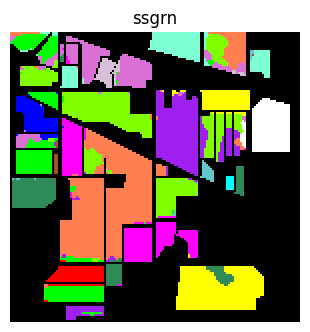

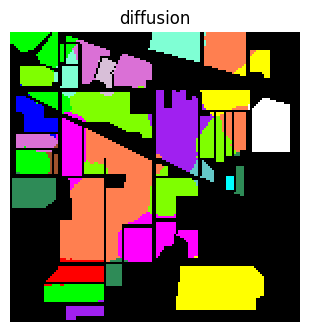

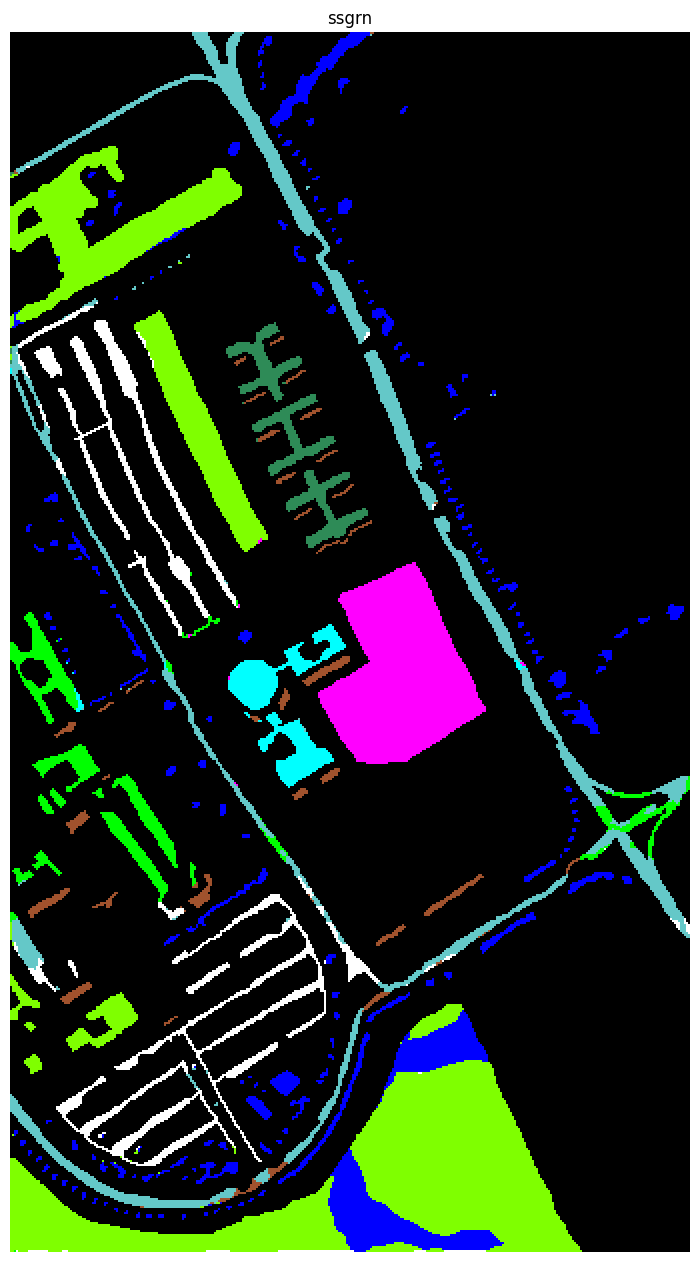

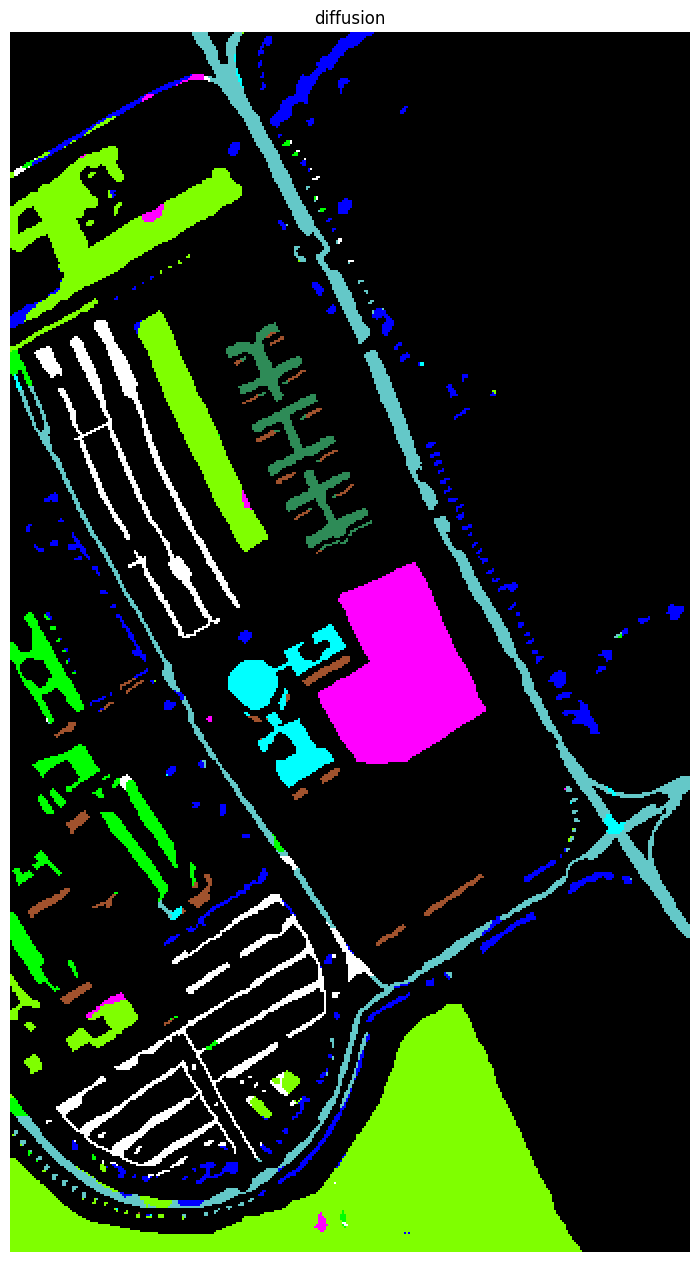

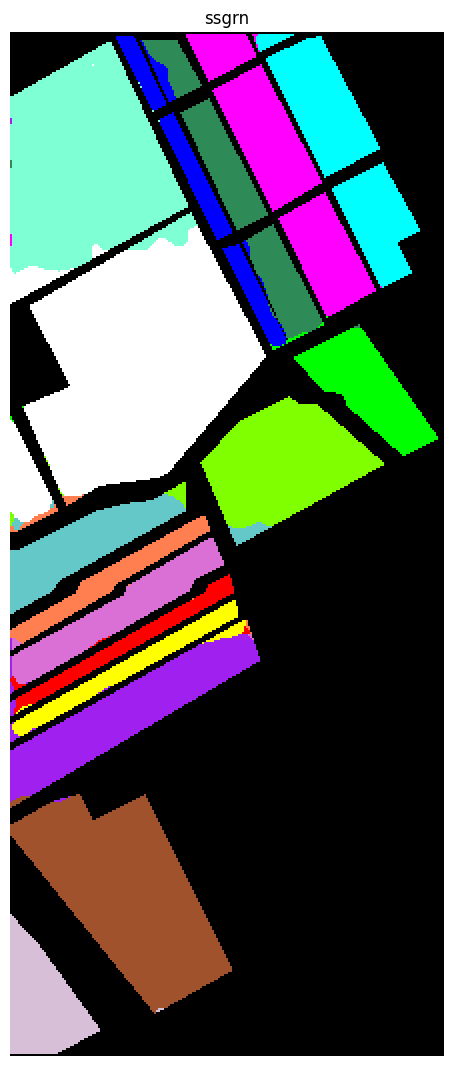

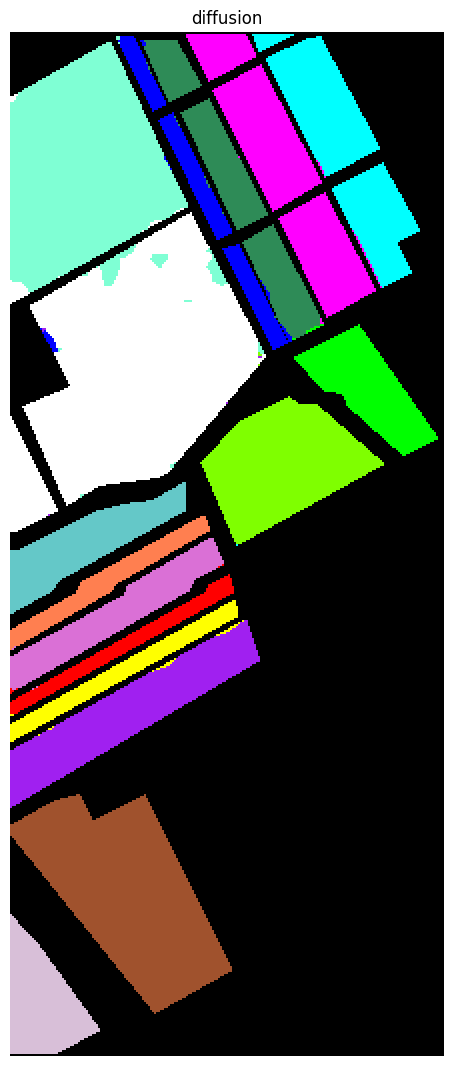

In [22]:
path_prefix = '../res_pred/'
num = 30
dirs = os.listdir(path_prefix)
class_nums=[16,9,16]
data_signs=['IP','PU','SA']
sign_aliases=['indian','pavia','salinas']
model_names=[
    'ssgrn',
#     'conv1d',
#     'conv2d',
#     'ssftt',
    'diffusion'
]
dpi = 100
test = False
data_to_colormap = plot.data_to_colormap2

for data_sign,alias,class_nums in zip(data_signs,sign_aliases,class_nums):
    if_indian=True if data_sign=='IP' else False

    dataset_path = '../../data/%s/%s_%s_split.mat' %(alias, alias, num)
    mat = sio.loadmat(dataset_path)
    data = mat['input']
    TR = mat['TR']
    TE = mat['TE']
    label = TR + TE 

    for name in model_names:
        path='%s/%s/%s_%s.pred.npy'%(path_prefix, num, alias, name)
        print(path)
        pred = load_data(path)
        print(pred.max())
        pred=pred+1
        pred[label==0] = 0
        save_path_prefix = '%s/pic/' % path_prefix
        if not os.path.exists(save_path_prefix):
            os.makedirs(save_path_prefix)
        save_path = '%s/%s_%s_%s' %(path_prefix, data_sign, name, num)
        plot_one(name, pred, data, save_path)


4500


0

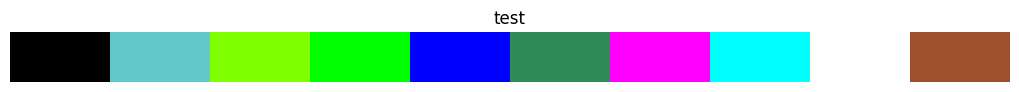

In [30]:
class_num=9
classindex = np.repeat(np.repeat(np.asarray([list(range(class_num+1))]),30, axis=1), 15, axis=0)
h,w = classindex.shape
class2color = data_to_colormap(classindex).reshape((h, w, 3))
plot.classification_map('test', class2color, np.zeros((h,w)), 60, './')


750


0

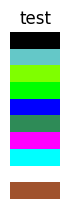

In [28]:
classindex = np.repeat(np.repeat(np.asarray([list(range(class_num+1))]).reshape((-1,1)),15, axis=1), 5, axis=0)
h,w = classindex.shape
class2color = data_to_colormap(classindex).reshape((h, w, 3))
plot.classification_map('test', class2color, np.zeros((h,w)), 60, './')

21025
207400
111104


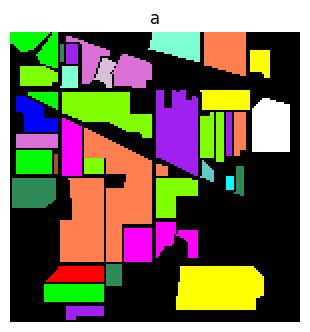

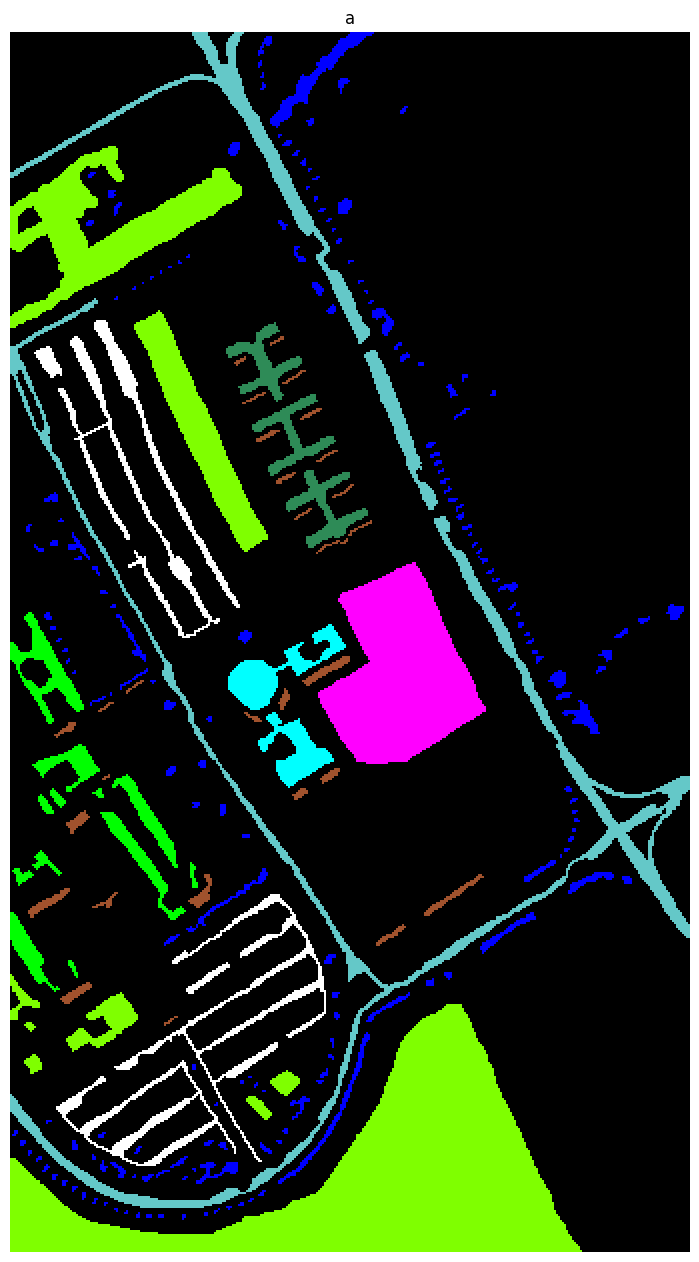

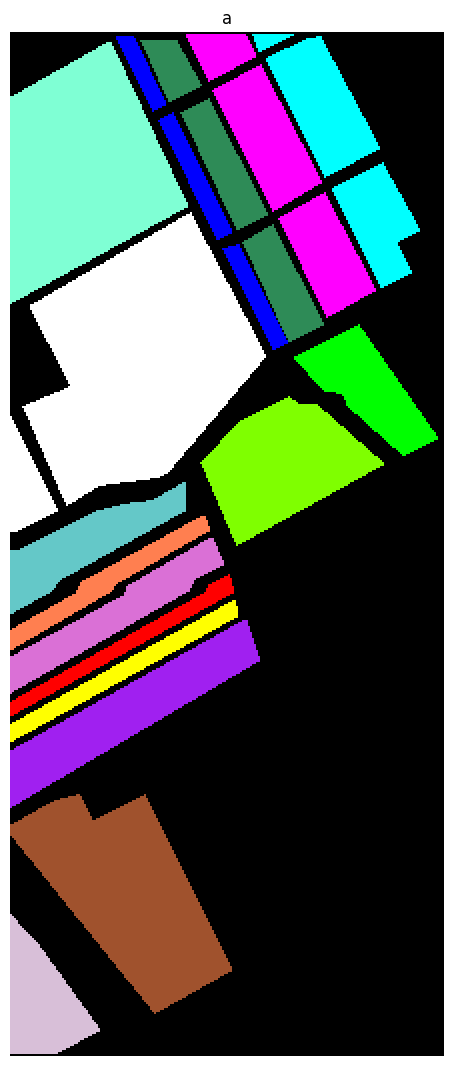

In [25]:
# ours, ssgrn, minigcn
def draw_true(alias):
    dpi = 100
    test = False
    data_to_colormap = plot.data_to_colormap2
    dataset_path = '../../data/%s/%s_30_split.mat' %(alias, alias)
    mat = sio.loadmat(dataset_path)
    data = mat['input']
    TR = mat['TR']
    TE = mat['TE']
    label = TR + TE 
    plot_one('a', label, data, '.')
for alias in ['indian', 'pavia', 'salinas']:
    draw_true(alias)

21025
207400
111104


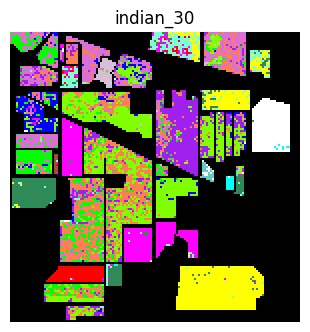

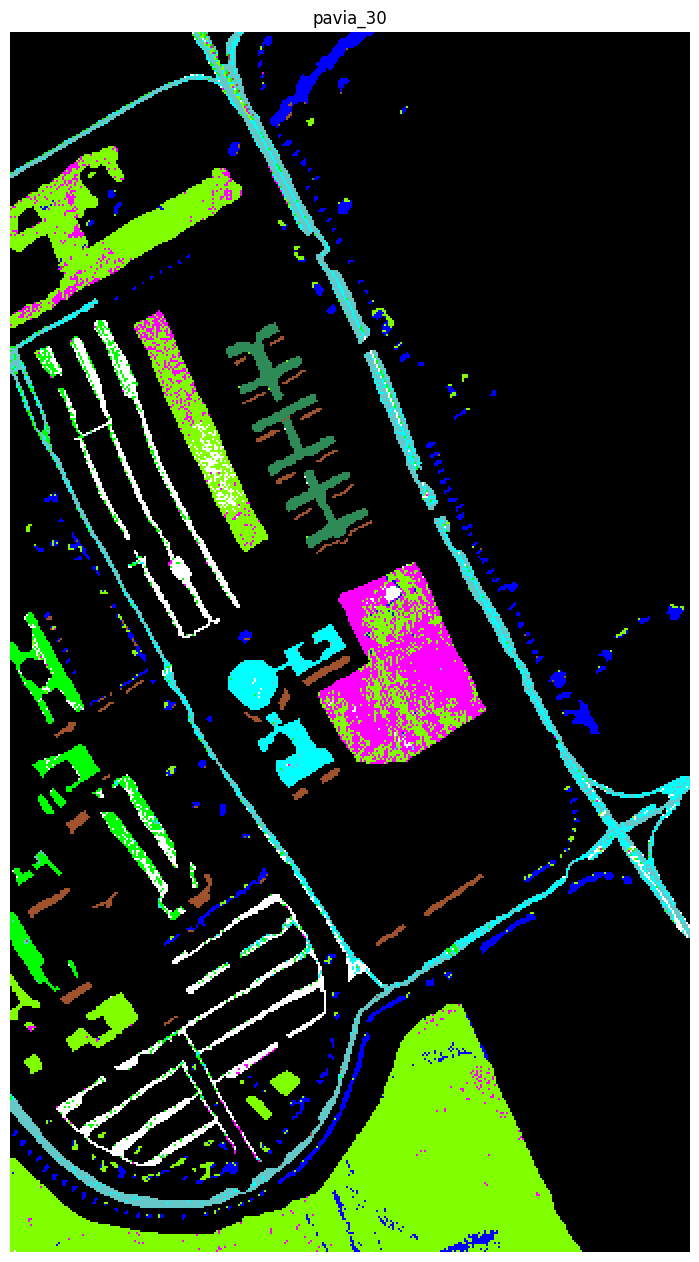

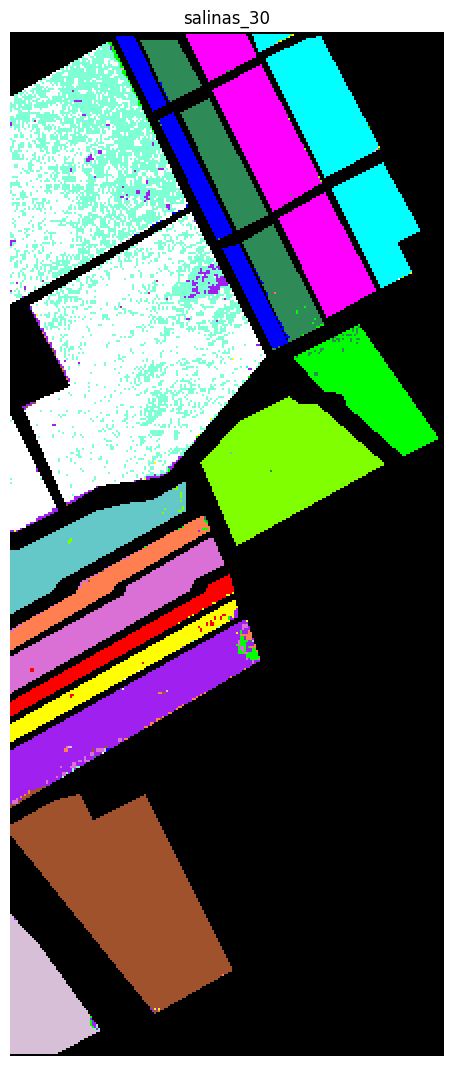

In [19]:
path_prefix = '../../data/miniGCN/'
def plot_miniGCN(sign, alias, sample_num, save_path):
    path = '%s/%s/%s' %(path_prefix, sign, sample_num)
    pred = scio.loadmat('%s/Pred' %path)['Pred_CM'].astype(np.int32)
    dataset_path = '../../data/%s/%s_30_split.mat' %(alias, alias)
    mat = sio.loadmat(dataset_path)
    data = mat['input']
    TR = mat['TR']
    TE = mat['TE']
    label = TR + TE 
    TR_tiff = tiff.imread('%s/TR.tiff' % path)
    pred_tmp = pred.reshape(-1)
    pred_tmp[TR_tiff.reshape(-1)>0]=0
    pred_tmp = pred_tmp.reshape(pred.shape)
    pred = pred_tmp + TR_tiff
    pred[label==0] = 0
    plot_one('%s_%s' %(alias, sample_num), pred, data, save_path)
    
sign2alias = {
    'Indian': 'indian',
    'Pavia': 'pavia',
    'Salinas': 'salinas'
}
n = 30
for sign in ['Indian', 'Pavia', 'Salinas']:
    plot_miniGCN(sign, sign2alias[sign],n, '%s/%s_miniGCN_%s' %(path_prefix,sign,n))

In [ ]:
test = False
mat = sio.loadmat(data_path)
# mat = sio.loadmat('../../../data/Houston/Houston_split.mat')
data = mat['input']
TR = mat['TR']
TE = mat['TE']
label = TR + TE 
for name in names:
    path = find_path(name)
    path = '../res/%s' % path
    pred = np.load(path)
    if 'knn' in name or 'random' in path or 'svm' in path or 'spectral_former' in path:
        pred = pred - 1
    else:
        pred = pred
    if test:
        pred[label==0] = 0
    plot_one(pred, data)
    
    
    

In [ ]:
plot_one(label-1, data)

In [ ]:
def show_tensor_image(image, rgb=(0,1,2)):
    if type(image) != np.ndarray:
        image = image.numpy()
    r,g,b = rgb
    if len(image.shape) == 4:
        image = image[0, :, :, :] 
    if len(image.shape) == 5:
        image = image[0, 0, :, :, :]
    if image.shape[-1] > 3:
        rimg = image[r,:,:]
        gimg = image[g,:,:]
        bimg = image[b,:,:]
    image = np.stack([rimg,gimg,bimg])
     
    def trans(x):
        if type(x) == np.ndarray:
            return np.transpose(x, (1,2,0))
        else:
            return x.permute(1,2,0)

    def totype(x):
        if type(x) == np.ndarray:
            return x.astype(np.uint8)
        else:
            return x.numpy().astype(np.uint8)
    
    reverse_transforms = transforms.Compose([
        # transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: trans(t)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: totype(t)),
        transforms.ToPILImage(),
    ])
        # Take first image of batch
    plt.imshow(reverse_transforms(image))
    
def norm(data):
    norm_data = np.zeros(data.shape)
    for i in range(data.shape[2]):
        input_max = np.max(data[:,:,i])
        input_min = np.min(data[:,:,i])
        norm_data[:,:,i] = (data[:,:,i]-input_min)/(input_max-input_min)
    return norm_data

In [67]:
for name in names:
    path = find_path(name)
    path = '../res/%s' % path
    print(path, name)

../res/houston_knn.json_1678966242.pred.npy houston_knn.json
../res/houston_random_forest.json_1678966263.pred.npy houston_random_forest.json
../res/houston_svm.json_1678966301.pred.npy houston_svm.json
../res/houston_conv1d.json_1678966334.pred.npy houston_conv1d.json
../res/houston_conv2d.json_1678966391.pred.npy houston_conv2d.json
../res/houston_conv3d.json_1678966559.pred.npy houston_conv3d.json
../res/houston_spectral_former.pred.npy houston_spectral_former
../res/None houston_cross_param.jsonhouston_cross_param_autoencoder.json


In [54]:
a = np.load('../res/Indian_GCN_1679384203.pred.npy')

In [56]:
a.max(), a.min()

(16.0, 0.0)

In [20]:
b = np.load('../res/houston_GCN.json_1680000324.pred.npy')

In [21]:
b.max()

14

In [18]:
pred.max()

30